# Structural Estimation: Analysis of Bootstrap Results

In [1]:
using Pkg
Pkg.activate(".")
#for pkg in ["BlackBoxOptim", "Cubature", "Distributions", "Integrals", "Roots", "JLD", "PythonPlot"]
#    Pkg.add(pkg)
#end

Pkg.instantiate()

using Base.Threads, BlackBoxOptim, Cubature, Distributions, Integrals, Random, Roots, JLD, PythonPlot

  Activating project at `C:\Users\jbrig\Documents\research\mapinator_2024`
    CondaPkg Found dependencies: C:\Users\jbrig\.julia\packages\PythonCall\Nr75f\CondaPkg.toml
    CondaPkg Found dependencies: C:\Users\jbrig\.julia\packages\PythonPlot\469aA\CondaPkg.toml
    CondaPkg Dependencies already up to date


In [2]:
res = load("estimated_parameters_truncated_normal_bootstrap_presentation.jld")

Dict{String, Any} with 17 entries:
  "estimations_per_round" => 5
  "k"                     => 4
  "stage_2_estimates"     => [3.99987 0.534188 … 0.183738 0.996081; 3.99885 0.6…
  "estimated_m_val"       => 13064
  "max_evals_stage_1"     => 1000000
  "base_m_t_values"       => Any[2664, 3635, 4481, 2284]
  "estimated_γ"           => [0.203919, 0.278246, 0.343004, 0.174832]
  "stage_2_fitness"       => [32979.6, 32978.7, 32975.2, 33023.6, 32872.5, 3295…
  "counter"               => [100002, 100002, 100002, 100002, 100002, 100002, 1…
  "base_placements"       => [383 84 55 14; 442 416 200 82; … ; 352 320 329 117…
  "placements"            => [377 461 … 372 532; 363 463 … 312 579; … ; 422 419…
  "bootstrap_samples"     => 10995
  "bootstrap_rounds"      => 1000
  "K"                     => 7
  "max_evals_stage_2"     => 100000
  "stage_1_estimates"     => [0.414355 0.565862 0.80137 0.50199; 0.399615 0.660…
  "stage_1_fitness"       => [0.0, 3.05188e-29, 0.0, 0.0, 0.0, 3.11251e-29, 0.0…

In [3]:
k = res["k"]
K = res["K"]

7

In [4]:
valid_indices = [i for i in 1:res["bootstrap_rounds"] if res["stage_1_fitness"][i] < 1e-25]

988-element Vector{Int64}:
    1
    2
    3
    4
    5
    6
    7
    8
    9
   10
   11
   12
   13
    ⋮
  989
  990
  991
  992
  993
  994
  995
  996
  997
  998
  999
 1000

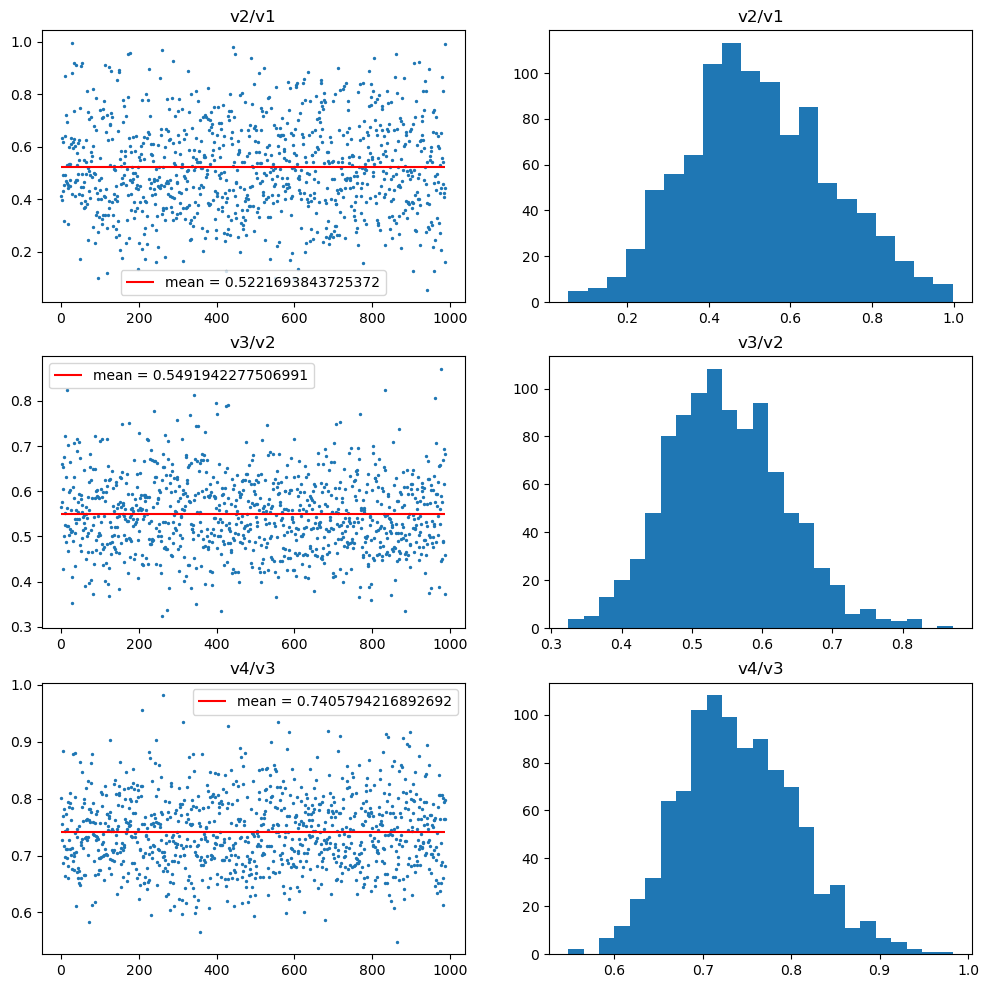

In [5]:
num_plots = 3
subplots(figsize = (6 * 2, 4 * num_plots))
clf()
subplot(3, 2, 1)
scatter(1:length(valid_indices), [res["stage_1_estimates"][i, 1] for i in valid_indices], s = 2)
v2v1_mean = mean([res["stage_1_estimates"][i, 1] for i in valid_indices])
hlines(v2v1_mean, 0, length(valid_indices), label = "mean = $v2v1_mean", colors = "red")
title("v2/v1")
legend()

subplot(3, 2, 2)
hist([res["stage_1_estimates"][i, 1] for i in valid_indices], bins = "auto")
title("v2/v1")


subplot(3, 2, 3)
scatter(1:length(valid_indices), [res["stage_1_estimates"][i, 2] for i in valid_indices], s = 2)
v3v2_mean = mean([res["stage_1_estimates"][i, 2] for i in valid_indices])
hlines(v3v2_mean, 0, length(valid_indices), label = "mean = $v3v2_mean", colors = "red")
title("v3/v2")
legend()

subplot(3, 2, 4)
hist([res["stage_1_estimates"][i, 2] for i in valid_indices], bins = "auto")
title("v3/v2")


subplot(3, 2, 5)
scatter(1:length(valid_indices), [res["stage_1_estimates"][i, 3] for i in valid_indices], s = 2)
v4v3_mean = mean([res["stage_1_estimates"][i, 3] for i in valid_indices])
hlines(v4v3_mean, 0, length(valid_indices), label = "mean = $v4v3_mean", colors = "red")
title("v4/v3")
legend()

subplot(3, 2, 6)
hist([res["stage_1_estimates"][i, 3] for i in valid_indices], bins = "auto")
title("v4/v3")

savefig("value_ratios.png")
;

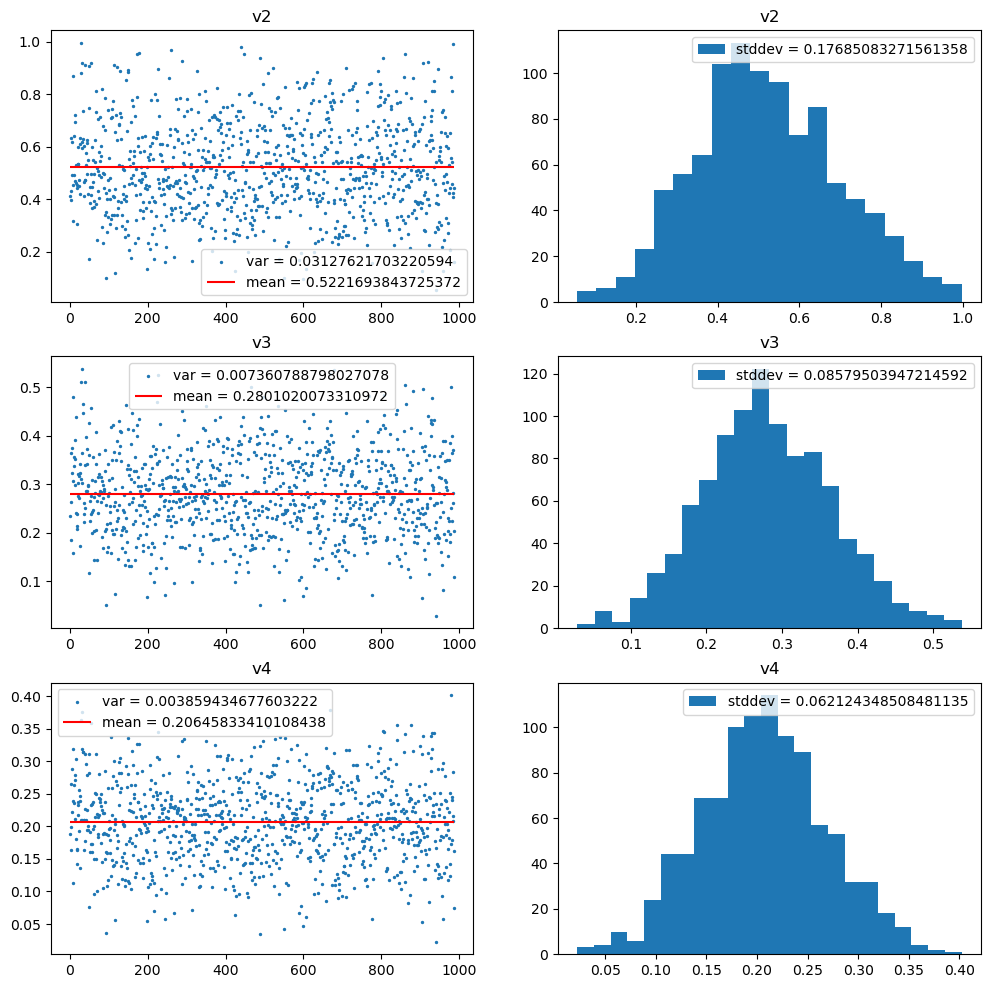

In [6]:
num_plots = 3
subplots(figsize = (6 * 2, 4 * num_plots))
clf()
subplot(3, 2, 1)
v2_estimates = [res["stage_1_estimates"][i, 1] for i in valid_indices]
scatter(1:length(valid_indices), v2_estimates, s = 2, label = "var = $(var(v2_estimates))")
v2_mean = mean(v2_estimates)
hlines(v2_mean, 0, length(valid_indices), label = "mean = $v2_mean", colors = "red")
title("v2")
legend()

subplot(3, 2, 2)
hist(v2_estimates, bins = "auto", label = "stddev = $(std(v2_estimates))")
title("v2")
legend()

v3_estimates = [res["stage_1_estimates"][i, 2] * v2_estimates[j] for (j, i) in enumerate(valid_indices)]

subplot(3, 2, 3)
scatter(1:length(valid_indices), v3_estimates, s = 2, label = "var = $(var(v3_estimates))")
v3_mean = mean(v3_estimates)
hlines(v3_mean, 0, length(valid_indices), label = "mean = $v3_mean", colors = "red")
title("v3")
legend()

subplot(3, 2, 4)
hist(v3_estimates, bins = "auto", label = "stddev = $(std(v3_estimates))")
title("v3")
legend()

v4_estimates = [res["stage_1_estimates"][i, 3] * v3_estimates[j] for (j, i) in enumerate(valid_indices)]

subplot(3, 2, 5)
scatter(1:length(valid_indices), v4_estimates, s = 2, label = "var = $(var(v4_estimates))")
v4_mean = mean(v4_estimates)
hlines(v4_mean, 0, length(valid_indices), label = "mean = $v4_mean", colors = "red")
title("v4")
legend()

subplot(3, 2, 6)
hist(v4_estimates, bins = "auto", label = "stddev = $(std(v4_estimates))")
title("v4")
legend()

savefig("values.png")
;

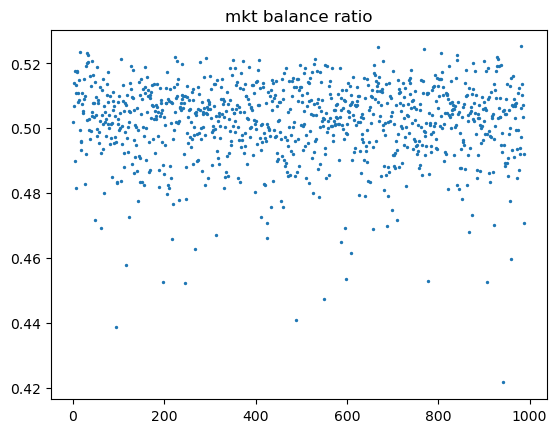

In [7]:
scatter(1:length(valid_indices), [res["stage_1_estimates"][i, k] for i in valid_indices], s = 2)
title("mkt balance ratio");

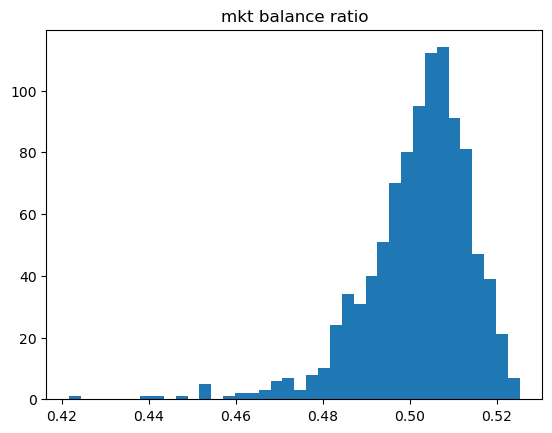

In [8]:
hist(res["stage_1_estimates"][valid_indices, k], bins = "auto")
title("mkt balance ratio");

In [9]:
rho_proportionate_sums = zeros(res["bootstrap_rounds"])
for i in valid_indices
    rho_proportionate_sums[i] = sum(res["stage_2_estimates"][i, 2K+1:3K])
end

In [10]:
# means and variances
for i in 1:k-1
    println("v_$(i+1)/v_$(i)")
    v_rel_estimates = sort(res["stage_1_estimates"][valid_indices, i])
    println("     mean: ", mean(v_rel_estimates))
    println("      var: ", var(v_rel_estimates))
    println("   stddev: ", std(v_rel_estimates))
    println("  confint: ", (v_rel_estimates[25], v_rel_estimates[975]))
    println()
end
println()

# t: label for printouts
# i: index for iterating over the data

println("τ")
τ_estimates = sort(res["stage_1_estimates"][valid_indices, k])
println("     mean: ", mean(τ_estimates))
println("      var: ", var(τ_estimates))
println("   stddev: ", std(τ_estimates))
println("  confint: ", (τ_estimates[25], τ_estimates[975]))
println()

for (t, i) in enumerate(1:K)
    normals_estimate = []
    for j in valid_indices
        μ_estimate = res["stage_2_estimates"][j, i]
        σ_estimate = res["stage_2_estimates"][j, i+K]
        push!(normals_estimate, truncated(Normal(μ_estimate, σ_estimate), 0, 1))
    end
    
    println("mean(F_$t)")
    mean_estimates = sort([mean(normal_est) for normal_est in normals_estimate])
    println("     mean: ", mean(mean_estimates))
    println("      var: ", var(mean_estimates))
    println("   stddev: ", std(mean_estimates))
    println("  confint: ", (mean_estimates[25], mean_estimates[975]))
    println()

    println("stddev(F_$t)")
    stddev_estimates = sort([std(normal_est) for normal_est in normals_estimate])
    println("     mean: ", mean(stddev_estimates))
    println("      var: ", var(stddev_estimates))
    println("   stddev: ", std(stddev_estimates))
    println("  confint: ", (stddev_estimates[25], stddev_estimates[975]))
    println()
    println()
end

for (t, i) in enumerate(2K+1:3K)
    println("ρ_$t")
    rho_estimates = sort([res["stage_2_estimates"][j, i] / rho_proportionate_sums[j] for j in valid_indices])
    println("     mean: ", mean(rho_estimates))
    println("      var: ", var(rho_estimates))
    println("   stddev: ", std(rho_estimates))
    println("  confint: ", (rho_estimates[25], rho_estimates[975]))
    println()
end 

v_2/v_1
     mean: 0.5221693843725375
      var: 0.03127621703220595
   stddev: 0.1768508327156136
  confint: (0.20461375043680824, 0.9196602900632755)

v_3/v_2
     mean: 0.5491942277506994
      var: 0.007095040581117296
   stddev: 0.08423206385407694
  confint: (0.394095978507785, 0.7543910341807586)

v_4/v_3
     mean: 0.7405794216892693
      var: 0.0043501501463276025
   stddev: 0.0659556680379147
  confint: (0.6202684898474483, 0.9025257607504394)


τ
     mean: 0.5018182213771849
      var: 0.00015194822354364055
   stddev: 0.01232672801450736
  confint: (0.4708936917278409, 0.521361790920139)

mean(F_1)
     mean: 0.6608663752397426
      var: 0.00772493798618207
   stddev: 0.08789162637124238
  confint: (0.5127335362017864, 0.837097762128677)

stddev(F_1)
     mean: 0.24676365579085785
      var: 0.0014346888263483382
   stddev: 0.037877286417434104
  confint: (0.15845433446805432, 0.2883817494974441)


mean(F_2)
     mean: 0.527477645898659
      var: 0.014118142736258723
  

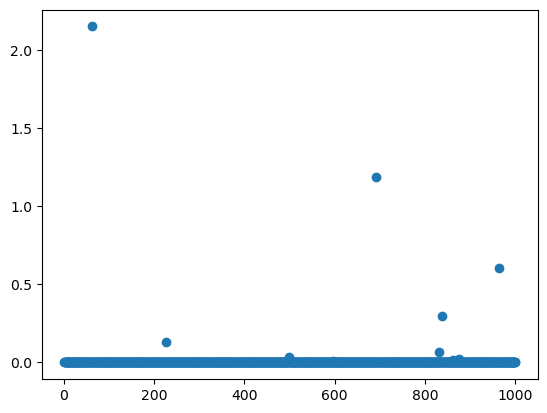

Python: <matplotlib.collections.PathCollection object at 0x000001BC4D0D6090>

In [11]:
scatter(1:res["bootstrap_rounds"], res["stage_1_fitness"])

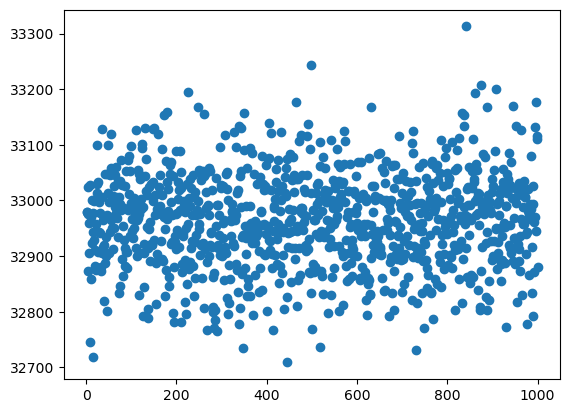

Python: <matplotlib.collections.PathCollection object at 0x000001BC4D0E33D0>

In [12]:
scatter(1:res["bootstrap_rounds"], res["stage_2_fitness"])

In [13]:
res["base_placements"]

7×4 Matrix{Int64}:
 383    84    55   14
 442   416   200   82
 422   726   598  103
  88   224   293  240
 293   436   406  136
 352   320   329  117
 535  1032  1701  968

In [14]:
sum(res["base_placements"], dims = 1)

1×4 Matrix{Int64}:
 2515  3238  3582  1660

In [15]:
res["base_m_t_values"]

4-element Vector{Any}:
 2664
 3635
 4481
 2284

In [16]:
for i in 1:res["bootstrap_rounds"]
    placements = res["placements"][i, :, :]
    column_sums = sum(placements, dims = 1)
    for j in 1:k
        if column_sums[j] >= res["base_m_t_values"][j] - 25
            println(column_sums)
        end
    end
end

[2647 3219 3499 1630]


In [17]:
for i in 1:res["bootstrap_rounds"]
    if res["stage_1_fitness"][i] > 1e-25
        println(i, " ", res["stage_1_fitness"][i])
        display(res["placements"][i, :, :])
        println(sum(res["placements"][i, :, :], dims = 1), " ", res["stage_1_estimates"][i, :])
        println()
    end
end

62 2.1536666020139132


7×4 Matrix{Int64}:
 382    72    51    6
 428   438   189   81
 370   768   634  106
  87   250   284  233
 274   445   381  132
 313   323   347  122
 522  1076  1730  951

[2376 3372 3616 1631] [0.9999999999999999, 0.4523719830697625, 0.6752314146396304, 0.5105870998038536]

226 0.13436449954643373


7×4 Matrix{Int64}:
 396    87    59   10
 430   452   207   85
 405   724   566   94
  86   238   283  247
 257   437   398  144
 336   330   316  135
 522  1083  1685  983

[2432 3351 3514 1698] [0.9999999999999999, 0.3796625860713947, 0.8411286702551006, 0.5076200585357917]

499 0.03756317625428147


7×4 Matrix{Int64}:
 385    86    66   14
 412   372   197   78
 400   767   634  109
  90   252   294  243
 292   473   402  151
 364   288   316  103
 490  1099  1635  983

[2433 3337 3544 1681] [0.9999999999999999, 0.4017210442884298, 0.7920639887666653, 0.5092302474316422]

572 0.0024315267868610293


7×4 Matrix{Int64}:
 370    76    62    11
 430   456   182    91
 378   673   566   114
  90   215   322   253
 292   478   421   143
 318   310   320   123
 508  1052  1739  1002

[2386 3260 3612 1737] [0.9999999999999999, 0.5346557649944721, 0.8097868512700365, 0.524905852723557]

595 0.006543794461419252


7×4 Matrix{Int64}:
 372    79    64   17
 421   394   191   77
 386   777   587   87
  76   212   287  217
 286   425   394  145
 352   357   318  123
 551  1098  1709  993

[2444 3342 3550 1659] [0.9999999999999999, 0.39209734930191364, 0.7592946241338129, 0.5064634274233931]

692 1.187029455937992


7×4 Matrix{Int64}:
 375    99    45    9
 450   455   202   88
 384   750   590   89
  69   242   275  250
 288   450   409  141
 351   323   352   95
 487  1058  1671  998

[2404 3377 3544 1670] [0.9999999999999999, 0.39293455924012627, 0.7778758515868248, 0.5072918976641342]

832 0.06666351150999694


7×4 Matrix{Int64}:
 371    93    53    9
 414   443   185   70
 433   736   604  101
 100   219   308  227
 299   479   414  148
 346   333   322  117
 487  1063  1673  948

[2450 3366 3559 1620] [0.9999999999999999, 0.3727569780193096, 0.7077952528094549, 0.5009266216936968]

838 0.3008659217210488


7×4 Matrix{Int64}:
 373    81    59    17
 437   432   186    70
 406   769   586   127
  90   231   271   250
 278   433   414   158
 305   334   293   128
 505  1035  1723  1004

[2394 3315 3532 1754] [0.9999999999999997, 0.4422633974750186, 0.9126801412814572, 0.5182838420211467]

842 1.985270572673119e-5


7×4 Matrix{Int64}:
 358    97    48   15
 434   449   198   95
 419   696   617  106
  74   248   276  268
 297   481   398  160
 333   322   339  128
 501  1004  1683  951

[2416 3297 3559 1723] [0.9999999999999994, 0.452242417867962, 0.8377275181914073, 0.517447601302472]

861 0.015004162370703258


7×4 Matrix{Int64}:
 372    90    51   10
 434   440   176   85
 419   772   562  100
  92   254   320  234
 274   457   376  150
 334   317   348  121
 528  1028  1674  977

[2453 3358 3507 1677] [0.9999999999999996, 0.356530249266316, 0.8179098311520718, 0.5029715995159235]

875 0.021511038266768857


7×4 Matrix{Int64}:
 360    94    55   13
 410   404   212   92
 398   758   605   82
  94   248   306  252
 304   427   420  126
 340   328   329  132
 503  1041  1669  993

[2409 3300 3596 1690] [0.9999999999999999, 0.47435190255212795, 0.7594495405650397, 0.5172376247373197]

964 0.6055964351298382


7×4 Matrix{Int64}:
 367    86    55   13
 432   399   207   86
 388   762   642  116
  74   233   280  222
 282   429   416  136
 332   350   324  108
 547  1115  1647  947

[2422 3374 3571 1628] [0.9999999999999999, 0.39309347949562845, 0.7071033242046628, 0.5041304376013886]

